# Boston House Price Prediction

### Introduction About The Data:

In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set (regression).


There are 13 independent variables:

* `CRIM`: per capita crime rate by town
* `ZN`: proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS`: proportion of non-retail business acres per town
* `CHAS`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* `NOX`: nitric oxides concentration (parts per 10 million)
* `RM`: average number of rooms per dwelling
* `AGE`: proportion of owner-occupied units built prior to 1940
* `DIS`: weighted distances to five Boston employment centres
* `RAD`: index of accessibility to radial highways
* `TAX`: full-value property-tax rate per $10,000
* `PTRATIO`: pupil-teacher ratio by town
* `B`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* `LSTAT`: % lower status of the population

Target variable:

* `MEDV`: Median value of owner-occupied homes in $1000's

Dataset Source Link: http://lib.stat.cmu.edu/datasets/boston


In [1]:
import pandas as pd

# read the data
df = pd.read_csv('data/boston.csv')

# check the top-5 records
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
# check is there any null exists or not
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [3]:
# No missing values present in the data, so we don't need to worry about the feature engineering.

In [4]:
# check data-types and non-count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
## check for duplicated records
df.duplicated().sum()

0

In [6]:
# find numerical and categorical columns
numerical_columns = df.columns[df.dtypes!='object']
categorical_columns = df.columns[df.dtypes=='object']
print("Numerical columns:", list(numerical_columns))
print('Categorical Columns:', list(categorical_columns))

Numerical columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Categorical Columns: []


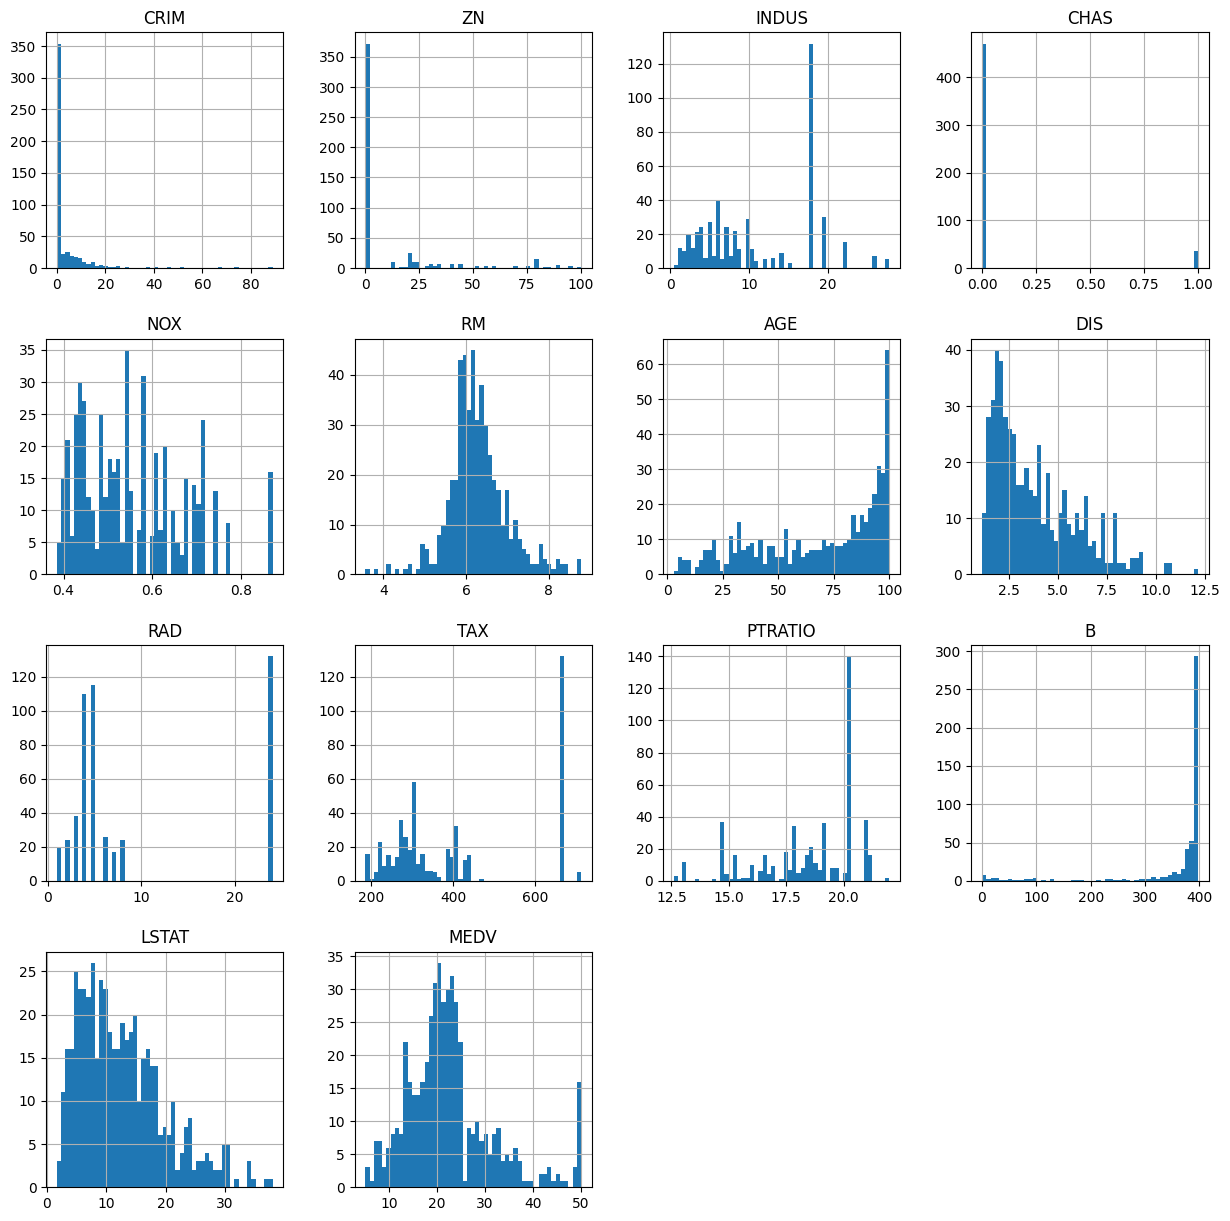

In [7]:
# Check the distribution of the each variable with the help of histogram
import matplotlib.pyplot as plt
bin_size = int(round(df.shape[0]/10, 0))
df.hist(figsize=(15, 15), bins=bin_size)
plt.show()


In [ ]:
# observation of the histogram plots:
# +ve skewed variables: CRIM, ZN, CHAS, DIS, LSTAT
# -ve skewed variables: INDUS, AGE, TAX, PTRATIO, B
# normal distributed variables: NOX, RM, RAD, MEDV

In [8]:
# Find statistical distribution of the variable
# Finding the Best Distribution that Fits Data using Python’s Fitter Library
import numpy as np
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

# The Fitter class in the backend uses the Scipy library which supports 80-distributions and the Fitter class will scan all of them, 
# call the fit function for you, ignoring those that fail or run forever and finally give you a summary of the best distributions 
# in the sense of sum of the square errors. 
# The fit statistics are (i) sumsquare_error, (ii) Akaike information criterion (aic), and (iii) Bayesian information criterion (bic) values

discrete_distribution = ["randint", "binom", "bernoulli", "poisson"]
continuous_distribution = ["uniform", "norm", "t", "chi2", "expon"]
custom_list = discrete_distribution + continuous_distribution

res = {}
for col in df.columns:
    # f = Fitter(df[cols[0]].values, distributions=get_common_distributions())
    # f = Fitter(df[cols[0]].values, distributions=get_distributions())
    f = Fitter(df[col].values, distributions=custom_list)
    f.fit()
    # f.summary()
    # identify the best distribution
    best_distribution = f.get_best(method='sumsquare_error')
    # identify the fitted parameters
    res[col] = best_distribution

SKIPPED randint distribution (taking more than 30 seconds)
SKIPPED binom distribution (taking more than 30 seconds)
SKIPPED bernoulli distribution (taking more than 30 seconds)
SKIPPED poisson distribution (taking more than 30 seconds)
SKIPPED randint distribution (taking more than 30 seconds)
SKIPPED binom distribution (taking more than 30 seconds)
SKIPPED bernoulli distribution (taking more than 30 seconds)
SKIPPED poisson distribution (taking more than 30 seconds)
SKIPPED randint distribution (taking more than 30 seconds)
SKIPPED binom distribution (taking more than 30 seconds)
SKIPPED bernoulli distribution (taking more than 30 seconds)
SKIPPED poisson distribution (taking more than 30 seconds)
SKIPPED randint distribution (taking more than 30 seconds)
SKIPPED binom distribution (taking more than 30 seconds)
SKIPPED bernoulli distribution (taking more than 30 seconds)
SKIPPED poisson distribution (taking more than 30 seconds)
SKIPPED randint distribution (taking more than 30 second

In [10]:
# display the distribution type of each variable
for var in res.keys():
    print(var)
    print(res[var])

CRIM
{'chi2': {'df': 0.5145755612508758, 'loc': 0.006319999999999999, 'scale': 14.511963615697166}}
ZN
{'expon': {'loc': 0.0, 'scale': 11.363636363636363}}
INDUS
{'chi2': {'df': 3.9548478101535474, 'loc': 0.28816140209612107, 'scale': 2.7431381260665724}}
CHAS
{'expon': {'loc': 0.0, 'scale': 0.0691699604743083}}
NOX
{'norm': {'loc': 0.5546950592885376, 'scale': 0.11576311540656137}}
RM
{'t': {'df': 3.47942117929816, 'loc': 6.230816280501948, 'scale': 0.4926936325405005}}
AGE
{'uniform': {'loc': 2.9, 'scale': 97.1}}
DIS
{'chi2': {'df': 2.9270753433955248, 'loc': 1.117510277093233, 'scale': 0.9147491965210103}}
RAD
{'t': {'df': 0.6621603258178678, 'loc': 4.519292444467716, 'scale': 1.153356327790886}}
TAX
{'chi2': {'df': 3.1223448722874485, 'loc': 183.0160842594678, 'scale': 72.13204389867926}}
PTRATIO
{'t': {'df': 4453479.519768316, 'loc': 18.455503014348654, 'scale': 2.1629249908648034}}
B
{'t': {'df': 232253.2726773526, 'loc': 356.67542254398916, 'scale': 91.20303716464919}}
LSTAT
{'t

<Axes: >

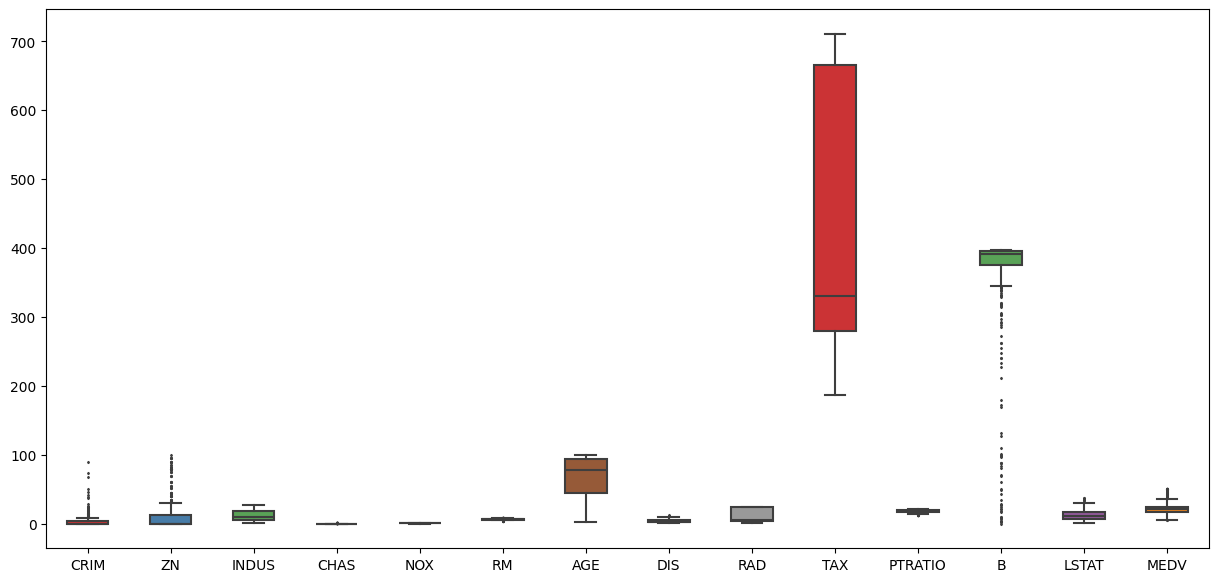

In [12]:
# Checking any outlier are present in the data with the help of Boxplot or scatterplot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
fig, axes = plt.subplots(figsize=(15, 7))
sns.boxplot(data=df, fliersize=1.2, width=0.5, ax=axes, palette='Set1')

In [ ]:
# Following variables have the most outliers that we need to take care: CRIM, ZN, B

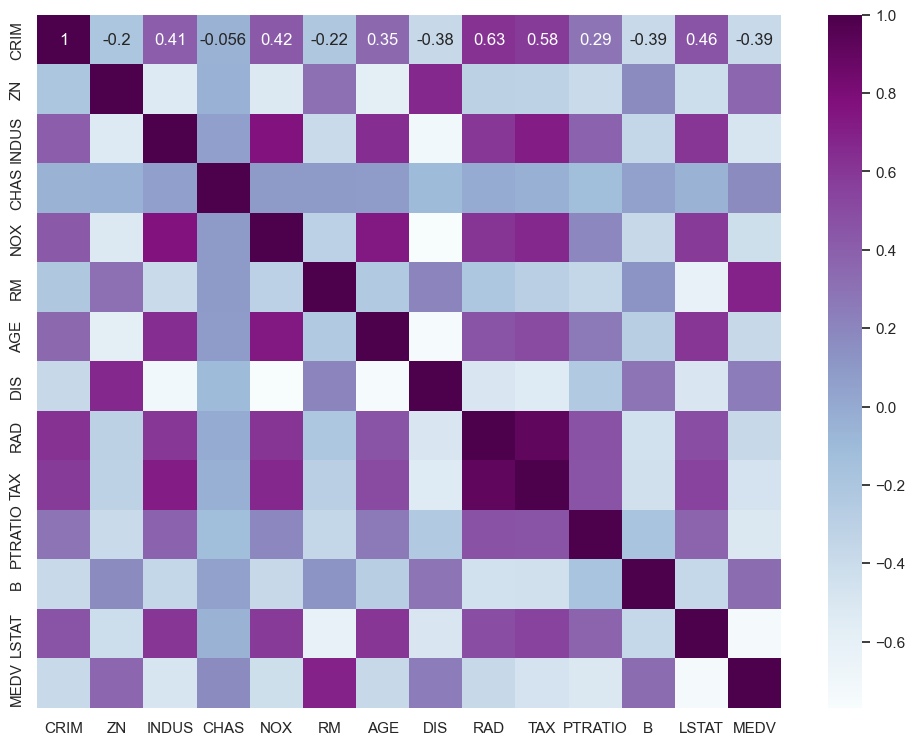

In [24]:
## correlation test
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
# sns.set(rc={'figure.figsize':(12, 9)})
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', annot_kws={'size': 12})
plt.show()

In [25]:
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
# It is noticed that some of the variables are correlated with each other. So we need to check the VIF (Variance Inflation Factors) Score 
# to see if any collinearity between the variables exists or not.
# VIF -> A measure of the amount of multicollinearity in a set of multiple regression variables = 1/(1 - R^2)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# as we don't have any categorical variable, therefore we don't need to convert to numerical values from categorical values
df2 = df.drop(['MEDV'], axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

print(vif_data)

    feature        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


In [ ]:
# As we can see, NOX, RM, TAX, and PTRATIO are having very high values of VIF, indicating that these variables are highly correlated.

In [ ]:
# Normalization
# -> for +ve, -ve, and normal distributed variables, min-max scalers needs to apply
# -> for outlier variables, Feature Clipping needs to apply